In [52]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: statsmodels in c:\users\bebit\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (0.14.0)




[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\bebit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2, 228.3, 62.3, 
       262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6, 95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1, 175.1, 89.7, 239.9, 227.2, 
       66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9, 7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5, 139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 
       129.4, 213.4, 16.9, 27.5, 120.5, 5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8, 134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 
       184.9, 289.7, 135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7, 209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 
       18.8, 224.0, 123.1, 229.5, 87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7, 43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 
       240.1, 243.2, 38.0, 44.7, 280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7, 188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 
       50.0, 164.5, 19.6, 168.4, 222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0, 139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 
       149.7, 38.2, 94.2, 177.0, 283.6, 232.1]  # Gasto en publicidad TV
radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1, 7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5, 29.3, 16.7, 
         27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6, 41.7, 46.2, 28.8, 49.4, 
         28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8, 9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5, 29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 
         43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9, 1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 
         15.4, 20.6, 46.8, 35.0, 14.3, 0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0, 39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 
         43.9, 17.0, 35.4, 33.2, 5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5, 1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6,
         5.2, 23.6, 10.6, 11.6, 20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1, 2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 
         4.9, 9.3, 42.0, 8.6]  # Gasto en publicidad radio
periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0, 65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2, 18.3, 19.5, 12.6, 
             22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0, 45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9, 36.8, 34.6, 3.6, 39.6, 58.7, 
             15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7, 27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1, 89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 
             36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2, 73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8, 100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 
             23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7, 34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6, 9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 
             65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9, 75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7, 9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 
             49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4, 57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3, 27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 
             3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0, 13.8, 8.1, 6.4, 66.2, 8.7]  # Gasto en publicidad periódico
ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7, 19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9, 
           18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
           5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3, 18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
           21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
           14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6, 6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
           19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6, 3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
           15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7, 26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
           25.5, 13.4]  # Número ventas

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico': periodico, 'ventas': ventas})


In [54]:
# 1. Obtenga la distribución de cada una de las variables
datos.describe()

,tv,radio,periodico,ventas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [55]:
# 2. Separe sus datos en 70/30
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# 3. Obtenga su modelo de Regresión lineal
regresion = LinearRegression()
regresion.fit(X_train, y_train)

LinearRegression()

In [57]:
# 4. Entregue la recta matemática de regresión con las estimaciones obtenidas
intercepto = regresion.intercept_
coeficientes = regresion.coef_

recta_regresion = f"ventas = {intercepto} + {coeficientes[0]} * tv + {coeficientes[1]} * radio + {coeficientes[2]} * periodico"
print(recta_regresion)

ventas = 2.7089490925159065 + 0.04405928095746522 * tv + 0.19928749689893954 * radio + 0.006882452222275487 * periodico


Text(0, 0.5, 'Residuos')

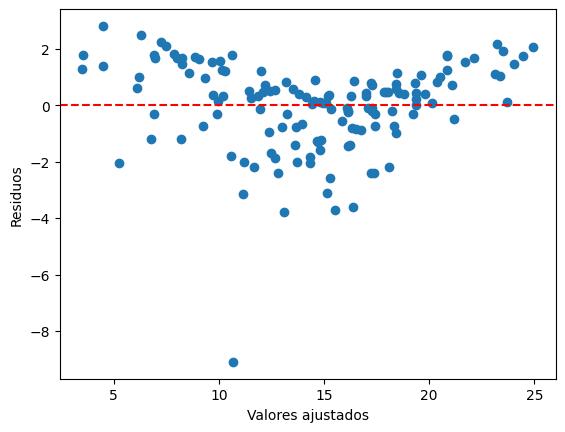

In [58]:
# 5. Realice un diagnóstico de los residuos del modelo.
y_pred_train = regresion.predict(X_train)
residuos = y_train - y_pred_train

# Gráfico de dispersión de los residuos
plt.scatter(y_pred_train, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')


In [67]:
# 6. Realice el test de normalidad
modelo = sm.OLS(y_train, X_train).fit()
residuos = modelo.resid
_, p_valor = stats.normaltest(residuos)
es_normal = p_valor > 0.05  # Si p-valor > 0.05, se considera normal
print(f"El modelo es normal: {es_normal}")

El modelo es normal: False


In [68]:
# 7. Obtenga las predicciones del modelo
predicciones = modelo.predict(X_test)
print(predicciones)

95     16.882891
15     22.192560
30     22.571715
158    10.089024
128    22.553575
115    13.106915
69     21.802710
170     5.660271
174    12.548701
45     14.900230
66      7.262913
182     4.916446
165    14.927409
78      7.298368
186     8.313810
177    11.400155
56      7.770928
152    15.817326
82      9.284396
68     18.742873
124    20.973317
16     14.595050
148    11.400571
93     22.982906
65      5.688198
60      3.733916
84     21.589932
67     10.717936
125     7.805490
132     6.661022
9      11.401210
18      8.667943
55     22.932733
75     12.983258
150    18.521362
104    20.188759
135    13.369404
137    22.122947
164     9.507461
76      2.286677
79      8.289350
197    11.385951
38      9.142818
24      6.518491
122    12.465232
195     3.145797
29      8.269009
19     13.482588
143     7.524608
86     10.567003
114    15.500699
173    10.600051
5      13.389201
126    10.474529
117     4.479399
73      8.726162
140     7.957253
98     25.782045
172     5.9903

In [71]:
# 8. Entregue el error del test
error_test = np.sqrt(mean_squared_error(y_test, predicciones))
print(error_test)



2.38990518935075


In [ ]:
#Preguntas guia 


#Algoritmos de regresión lineal simple

# Los algoritmos de regresión lineal simple encuentran la mejor línea recta que se ajusta a los datos, permitiendo predecir los valores de una variable en 
# función de otra. Utilizan un enfoque de mínimos cuadrados para encontrar los coeficientes de la línea recta. Una vez ajustado el modelo, se pueden hacer 
# predicciones y comprender la relación entre las variables. En resumen, la regresión lineal simple busca una línea recta que se ajuste a los datos y permite 
# predecir valores basados en esa línea.



# Quién o qué es la variable respuesta

# La variable respuesta es aquella que queremos predecir o explicar en un modelo de regresión. Es la variable objetivo a la que queremos encontrar una relación 
# con otras variables independientes. Por ejemplo, en la regresión lineal simple, la variable respuesta es la que intentamos predecir utilizando una sola variable 
# independiente.